In [89]:
import pandas as pd

In [90]:
pd.set_option("display.max_columns", None)


In [91]:
df = pd.read_csv("../data/processed/star_wars_survey_cleaned.csv")

In [92]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Have you seen Star Wars: Episode I The Phantom Menace?,Have you seen Star Wars: Episode II Attack of the Clones?,Haven you seen Star Wars: Episode III Revenge of the Sith?,Have you seen Star Wars: Episode IV A New Hope?,Have you seen Star Wars: Episode V The Empire Strikes Back?,Have you seen Star Wars: Episode VI Return of the Jedi?,Ranking of Episode 1,Ranking of Episode 2,Ranking of Episode 3,Ranking of Episode 4,Ranking of Episode 5,Ranking of Episode 6,Are you familiar with Han Solo?,Are unfamiliar with Luke Skywalker?,Are unfamiliar with Princess Leia Organa?,Are unfamiliar with Anakin Skywalker?,Are unfamiliar with Obi Wan Kenobi?,Are unfamiliar with Emperor Palpatine?,Are unfamiliar withDarth Vader?,Are unfamiliar with Lando Calrissian?,Are unfamiliar with Boba Fett?,Are unfamiliar with C-3P0?,Are unfamiliar with R2 D2?,Are unfamiliar with Jar Jar Binks?,Are unfamiliar with Padme Amidala?,Are unfamiliar with Yoda?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3.292880e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Yes,No,No,Male,Young Adult,NaN,High school degree,South Atlantic
1,3.292880e+09,No,NaN,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,Young Adult,Low Income,Bachelor degree,West South Central
2,3.292765e+09,Yes,No,Yes,Yes,Yes,No,No,No,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),No,NaN,No,Male,Young Adult,Low Income,High school degree,West North Central
3,3.292763e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,No,NaN,Yes,Male,Young Adult,Upper-Middle Income,Some college or Associate degree,West North Central
4,3.292731e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Yes,No,No,Male,Young Adult,Upper-Middle Income,Some college or Associate degree,West North Central


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

Which of the star wars movies has the highest rating?

Episode I: 3.74
Episode II: 4.09
Episode III: 4.34
Episode IV: 3.26
Episode V: 2.51
Episode VI: 3.04


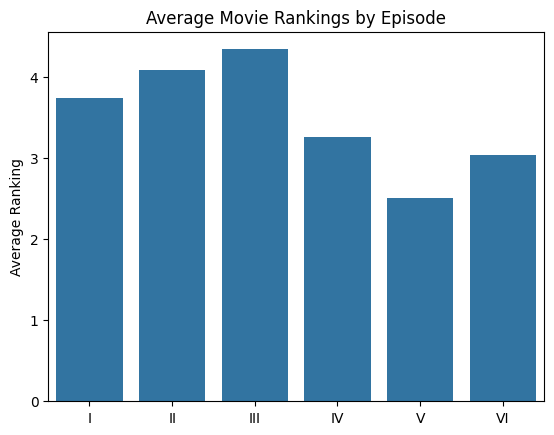

In [ ]:
cols = ['Ranking of Episode 1', 'Ranking of Episode 2', 'Ranking of Episode 3',
       'Ranking of Episode 4', 'Ranking of Episode 5', 'Ranking of Episode 6']

episodes = ["I", "II", "III", "IV", "V", "VI"]
average_ratings = [df[col].mean() for col in cols]

# Print averages
for ep, avg in zip(episodes, average_ratings):
    print(f"Episode {ep}: {avg:.2f}")

# Plot
sns.barplot(x=episodes, y=average_ratings)
plt.title("Average Movie Rankings by Episode")
plt.ylabel("Average Ranking")
plt.show()


How many of the participants have seen the star wars franchise?
And does Gender and Age affect, if someone has seen the Star wars film franchise or not?

In [95]:
seen_counts = df['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()
print(seen_counts)

Have you seen any of the 6 films in the Star Wars franchise?
Yes    820
No     226
Name: count, dtype: int64


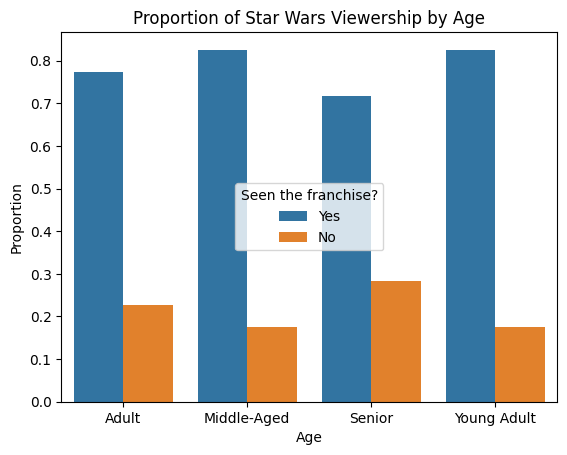

In [96]:
age_seen = (df.groupby('Age')['Have you seen any of the 6 films in the Star Wars franchise?']
            .value_counts(normalize=True)
            .rename('Proportion')
            .reset_index()
)

sns.barplot(
    data=age_seen,
    x='Age',
    y='Proportion',
    hue='Have you seen any of the 6 films in the Star Wars franchise?'
)

plt.title('Proportion of Star Wars Viewership by Age')
plt.legend(title='Seen the franchise?', loc='center')
plt.ylabel('Proportion')
plt.show()

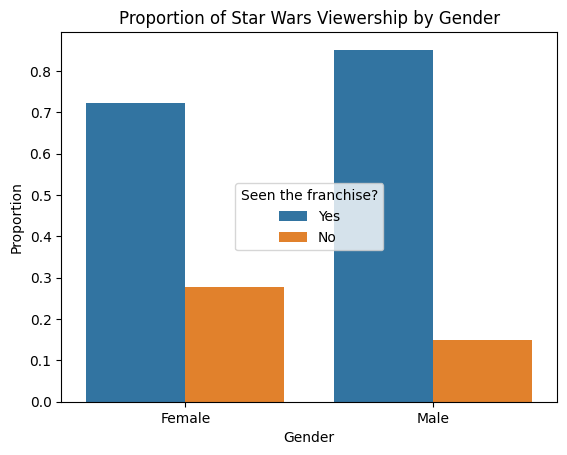

In [97]:
gender_seen = (df.groupby('Gender')['Have you seen any of the 6 films in the Star Wars franchise?']
               .value_counts(normalize=True)
               .rename('Proportion')
               .reset_index()
)

sns.barplot(
    data=gender_seen,
    x='Gender',
    y="Proportion",
    hue='Have you seen any of the 6 films in the Star Wars franchise?'
)
plt.title('Proportion of Star Wars Viewership by Gender')
plt.legend(title='Seen the franchise?', loc='center')
plt.ylabel('Proportion')
plt.show()

From which U.S. Census regions do the survey participants come?

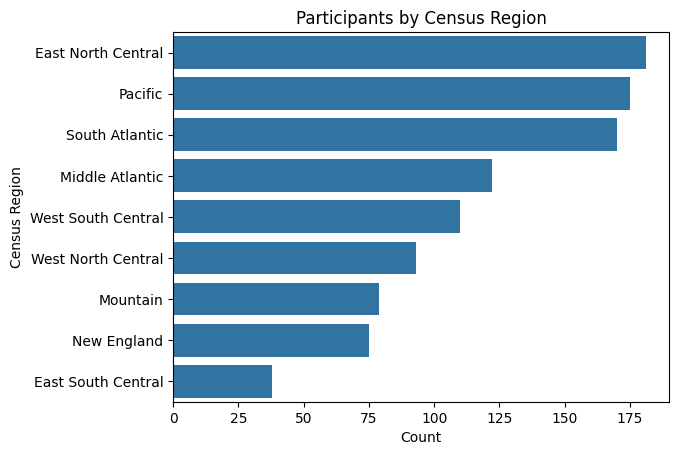

In [99]:
sns.countplot(data=df,
              y='Location (Census Region)',
              order= df['Location (Census Region)'].value_counts().index
              )

plt.title('Participants by Census Region')
plt.ylabel('Census Region')
plt.xlabel('Count')
plt.show()

Which of the character is the most recognized character in the star wars franchise?

-Which character is most familiar to respondents
-If someone answers “Unfamiliar (N/A)”, they do not know the character
-Any other response (favorably / unfavorably / neutral) implies they know the character
-Count how many respondents are unfamiliar with each character
-Compare those counts (or proportions)

In [104]:
results = []

cols = ['Are you familiar with Han Solo?',
       'Are unfamiliar with Luke Skywalker?',
       'Are unfamiliar with Princess Leia Organa?',
       'Are unfamiliar with Anakin Skywalker?',
       'Are unfamiliar with Obi Wan Kenobi?',
       'Are unfamiliar with Emperor Palpatine?',
       'Are unfamiliar withDarth Vader?',
       'Are unfamiliar with Lando Calrissian?',
       'Are unfamiliar with Boba Fett?', 'Are unfamiliar with C-3P0?',
       'Are unfamiliar with R2 D2?', 'Are unfamiliar with Jar Jar Binks?',
       'Are unfamiliar with Padme Amidala?', 'Are unfamiliar with Yoda?']

for col in cols:
    # Get normalized value counts
    vc = df[col].value_counts(normalize=True)
    
    # Get unfamiliar proportion (0 if not present)
    unfamiliar_prop = vc.get('Unfamiliar (N/A)', 0)
    
    results.append({
        'Character': col,
        'Unfamiliar_Proportion': unfamiliar_prop,
        'Familiar_Proportion': 1 - unfamiliar_prop
    })

results_df = pd.DataFrame(results)


In [105]:
results_df['Character'] = results_df['Character'] \
    .str.replace('Are unfamiliar with ', '', regex=False) \
    .str.replace('Are you familiar with ', '', regex=False) \
    .str.replace('?', '', regex=False)


In [106]:
best_known = results_df.sort_values(
    by='Unfamiliar_Proportion',
    ascending=True
)

best_known


,Character,Unfamiliar_Proportion,Familiar_Proportion
1,Luke Skywalker,0.007362,0.992638
2,Princess Leia Organa,0.009816,0.990184
6,Are unfamiliar withDarth Vader,0.011111,0.988889
10,R2 D2,0.012285,0.987715
13,Yoda,0.012346,0.987654
0,Han Solo,0.018450,0.981550
9,C-3P0,0.018496,0.981504
4,Obi Wan Kenobi,0.021014,0.978986
3,Anakin Skywalker,0.064436,0.935564
11,Jar Jar Binks,0.134161,0.865839
